In [54]:
from keras.datasets import mnist
import numpy as np
from keras.layers import Input,Conv2D,MaxPooling2D,UpSampling2D
from keras.models import Model
from keras.layers import Input, Dense
import matplotlib.pyplot as plt



In [55]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()


In [56]:
x_train.shape

(60000, 28, 28)

In [57]:
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.


In [58]:

x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))
print x_train.shape
print x_test.shape

(60000, 784)
(10000, 784)


In [59]:
encoding_dim = 32
input_img = Input(shape=(784,))

In [60]:
input_img.shape

TensorShape([Dimension(None), Dimension(784)])

In [61]:
encoded = Dense(encoding_dim, activation='relu')(input_img)
decoded = Dense(784, activation='sigmoid')(encoded)
autoencoder = Model(input_img, decoded)


In [62]:
autoencoder.compile(optimizer='adadelta', loss='binary_crossentropy')


In [69]:
autoencoder.fit(x_train, x_train,
                epochs=10,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test, x_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 1s 22us/step - loss: 0.1088 - val_loss: 0.1068
Epoch 2/10
60000/60000 [==============================] - 1s 21us/step - loss: 0.1082 - val_loss: 0.1063
Epoch 3/10
60000/60000 [==============================] - 1s 21us/step - loss: 0.1077 - val_loss: 0.1058
Epoch 4/10
60000/60000 [==============================] - 1s 22us/step - loss: 0.1072 - val_loss: 0.1053
Epoch 5/10
60000/60000 [==============================] - 1s 22us/step - loss: 0.1067 - val_loss: 0.1048
Epoch 6/10
60000/60000 [==============================] - 1s 22us/step - loss: 0.1063 - val_loss: 0.1044
Epoch 7/10
60000/60000 [==============================] - 1s 22us/step - loss: 0.1059 - val_loss: 0.1040
Epoch 8/10
60000/60000 [==============================] - 1s 22us/step - loss: 0.1055 - val_loss: 0.1036
Epoch 9/10
60000/60000 [==============================] - 1s 22us/step - loss: 0.1051 - val_loss: 0.1032
Epoch

In [70]:
test=autoencoder.predict(x_test)

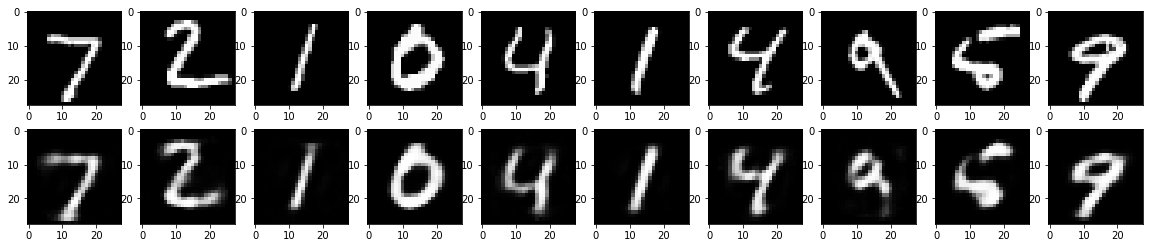

In [77]:
n = 10 
plt.figure(figsize=(20, 4))
for i in range(n):
    ax = plt.subplot(2, n, i+1)
    plt.imshow(x_test[i].reshape(28, 28))
    
    ax.get_xaxis().set_visible(True)
    ax.get_yaxis().set_visible(True)

    ax = plt.subplot(2, n, i + n+1)
    plt.imshow(test[i].reshape(28, 28))
    ax.get_xaxis().set_visible(True)
    ax.get_yaxis().set_visible(True)
plt.show()